# News Classification using Logistic Regression Model

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [2]:
df=pd.read_csv("final_news.csv")
df=df.drop("Date",axis=1)
df

,news,output
0,Sensex rises over 100 points; Nifty reclaims 1...,2
1,Corporate affairs min says no illegality in co...,1
2,SBI looks to divest 1% stake in NSE,2
3,DKD family war to air Grand Finale on January 5,1
4,"After Cyrus Mistry’s exit, growing under N Cha...",2
...,...,...
2227,UK’s Old War Office opens as hotel,1
2228,"Sensex falls 610 pts on selling spree, weak cues",0
2229,US inflation expectations fall in September,1
2230,Dussehra war for Shivaji Park begins anew betw...,1


In [3]:
#preprocessing

import re
import string

def preprocess(article):
    article=article.strip().replace('\n',' ')
    article="".join([i for i in article if i not in string.punctuation])
    article=re.sub(r'\s+', ' ', article)
    return article.lower()

In [4]:
df['news1']=df['news'].apply(lambda x: preprocess(x))
df

,news,output,news1
0,Sensex rises over 100 points; Nifty reclaims 1...,2,sensex rises over 100 points nifty reclaims 12200
1,Corporate affairs min says no illegality in co...,1,corporate affairs min says no illegality in co...
2,SBI looks to divest 1% stake in NSE,2,sbi looks to divest 1 stake in nse
3,DKD family war to air Grand Finale on January 5,1,dkd family war to air grand finale on january 5
4,"After Cyrus Mistry’s exit, growing under N Cha...",2,after cyrus mistry’s exit growing under n chan...
...,...,...,...
2227,UK’s Old War Office opens as hotel,1,uk’s old war office opens as hotel
2228,"Sensex falls 610 pts on selling spree, weak cues",0,sensex falls 610 pts on selling spree weak cues
2229,US inflation expectations fall in September,1,us inflation expectations fall in september
2230,Dussehra war for Shivaji Park begins anew betw...,1,dussehra war for shivaji park begins anew betw...


In [5]:
#lemmatization

import nltk
from nltk.stem import WordNetLemmatizer

def lemmatizeNews(article):
    tokens=re.split(' ',article)
    stopwords=nltk.corpus.stopwords.words('english')
    tokens= [i for i in tokens if i not in stopwords]
    lemmatizer=WordNetLemmatizer()
    lemm_text = [lemmatizer.lemmatize(word) for word in tokens]
    lemm_text=" ".join(lemm_text)
    return lemm_text

In [6]:
df['News']=df['news1'].apply(lambda x: lemmatizeNews(x))
df=df.drop('news',axis=1)
df=df.drop('news1',axis=1)
df

,output,News
0,2,sensex rise 100 point nifty reclaims 12200
1,1,corporate affair min say illegality conversion...
2,2,sbi look divest 1 stake nse
3,1,dkd family war air grand finale january 5
4,2,cyrus mistry’s exit growing n chandrasekaran t...
...,...,...
2227,1,uk’s old war office open hotel
2228,0,sensex fall 610 pt selling spree weak cue
2229,1,u inflation expectation fall september
2230,1,dussehra war shivaji park begin anew senas


In [7]:
x=df['News']
y=df['output']

In [8]:
#splitting data into train and test sets
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=43)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf=TfidfVectorizer(ngram_range=(1,2))

x_train=tf_idf.fit_transform(x_train)
x_test=tf_idf.transform(x_test)

x_train=x_train.toarray()
x_test=x_test.toarray()

In [10]:
import joblib
joblib.dump(tf_idf, "vectorizer.sav")

['vectorizer.sav']

In [11]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [12]:
joblib.dump(lr, "log_reg_news.sav")

['log_reg_news.sav']

In [13]:
y_pred=lr.predict(x_test)

In [14]:
acc=accuracy_score(y_pred,y_test)
print('Accuracy Score = %0.2F'%(acc*100))
prec=precision_score(y_pred,y_test,average='weighted')
print('Precision Score = %0.2F'%(prec*100))
rec=recall_score(y_pred,y_test,average='weighted')
print('Recall Score = %0.2F'%(rec*100))
f1=f1_score(y_pred,y_test,average='weighted')
print('F1 Score = %0.2F'%(f1*100))

Accuracy Score = 81.64
Precision Score = 87.59
Recall Score = 81.64
F1 Score = 83.28


In [15]:
con=confusion_matrix(y_pred,y_test)
con

array([[ 52,   1,   8],
       [ 43, 407,  49],
       [ 17,   5,  88]], dtype=int64)

[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Neutral'), Text(0, 2.5, 'Positive')]

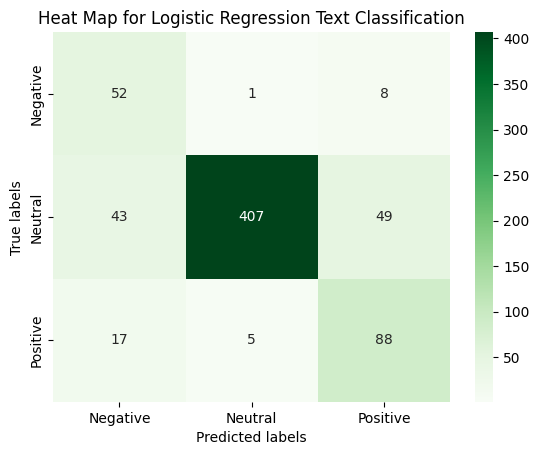

In [16]:
import matplotlib.pyplot as plt
import seaborn as sb

axis=plt.subplot()
sb.heatmap(con, annot=True, fmt='g',cmap='Greens')

# labels, title and ticks
axis.set_xlabel('Predicted labels')
axis.set_ylabel('True labels')
axis.set_title('Heat Map for Logistic Regression Text Classification')
axis.xaxis.set_ticklabels(['Negative','Neutral','Positive'])
axis.yaxis.set_ticklabels(['Negative','Neutral','Positive'])

# Prediction for Today's News

In [17]:
todayDf=pd.read_csv("Nov28News.csv")
todayDf=todayDf.drop("web-scraper-order",axis=1)
todayDf=todayDf.drop("web-scraper-start-url",axis=1)
todayDf

,News
0,Bengaluru’s first-ever Kambala ends on a grand...
1,Four-legged divas dazzle the catwalk at Bengal...
2,Thousands turn up to celebrate the LGBTQIA+ co...
3,Thousands turn up to celebrate the LGBTQIA+ co...
4,Playing a real-life character required me to b...
...,...
495,Innovative ways to capture big cat
496,Man booked for stabbing wife
497,Police must be more tourist-friendly: DC
498,Ramgarh school violence: Four minors surrender


In [18]:
#preprocessing

todayDf['news1']=todayDf['News'].apply(lambda x: preprocess(x))


#lemmatization

todayDf['news']=todayDf['news1'].apply(lambda x: lemmatizeNews(x))
todayDf=todayDf.drop('News',axis=1)
todayDf=todayDf.drop('news1',axis=1)
todayDf

,news
0,bengaluru’s firstever kambala end grand note
1,fourlegged diva dazzle catwalk bengalurus pet ...
2,thousand turn celebrate lgbtqia community
3,thousand turn celebrate lgbtqia community
4,playing reallife character required completely...
...,...
495,innovative way capture big cat
496,man booked stabbing wife
497,police must touristfriendly dc
498,ramgarh school violence four minor surrender


In [19]:
#vectorization

today=todayDf['news']
today=tf_idf.transform(today)
today=today.toarray()

In [20]:
#todays prediction

today_pred=lr.predict(today)

In [21]:
negative=np.count_nonzero(today_pred == 0)
neutral=np.count_nonzero(today_pred == 1)
positive=np.count_nonzero(today_pred == 2)

print("Negative News = ",negative)
print("Neutral News = ",neutral)
print("Positive News = ",positive)

Negative News =  0
Neutral News =  500
Positive News =  0
